In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split

## Import dataset

In [3]:
titanic_train = pd.read_csv('train.csv')
titanic_test = pd.read_csv('test.csv')

In [3]:
X = titanic_train

In [4]:
females = X['Sex'].loc[X['Sex']=="female"].count()
males = X["Sex"].count()-females

## Fill in null values for test set

In [5]:
Xtest = titanic_test
Xtest.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
def fillData(df,feature,parameter):
    if parameter == "median":
        df[feature] = df[feature].fillna(np.median(df[feature]))
    elif parameter == "mean":
        df[feature] = df[feature].fillna(df[feature].mean())
    else:
        df[feature] = df[feature].fillna(0)

In [7]:
par = 0
fillData(X,"Age",par)
fillData(Xtest,"Age",par)
fillData(X,"Fare",par)
fillData(Xtest,"Fare",par)
# fillData(X,"Embarked",par)
# fillData(Xtest,"Embarked",par)
X.dropna(subset= ["Embarked"],inplace = True)
Xtest.dropna(subset= ["Embarked"],inplace = True)

In [8]:
X.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [9]:
Xtest.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [10]:
Xtest['fare_class'] = Xtest['Fare']/Xtest['Pclass']
Xtest['Family'] = Xtest['Parch'] + Xtest['SibSp']

In [11]:
Xtest.drop(columns=['Cabin','Name','Ticket'],inplace=True)
X.drop(columns = ['Cabin','Name','Ticket'],inplace=True)

In [12]:
# Xtest = pd.get_dummies(Xtest)
# Xtest.head()

## Check count of data

In [13]:
X.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,23.740349,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,17.562609,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,6.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
id_pass = Xtest['PassengerId']

## Encode the data

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
Sex_class = LabelEncoder()
X['Sex_class'] = Sex_class.fit_transform(X['Sex'])
Xtest['Sex_class'] = Sex_class.fit_transform(Xtest['Sex'])

In [17]:
X = pd.get_dummies(X)
Xtest = pd.get_dummies(Xtest)

## Use seaborn sns heatmap

<AxesSubplot:>

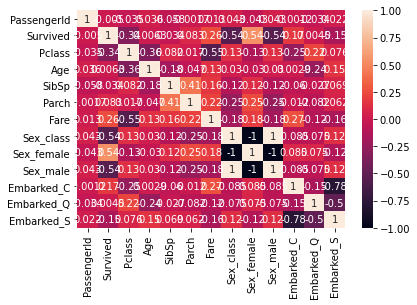

In [18]:
sns.heatmap(X.corr(),annot = True)

## Seaborn pairplot

In [19]:
# sns.pairplot(X)

## Head of dataframe

In [20]:
X.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_class,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1,0,0,1


# Feature Engineering

## Combine male and female

In [21]:
def xor(a, b):
    return (a and not b) or (not a and b)

In [22]:
male = X['Sex_male']
female = X['Sex_female']

In [23]:
X.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_class,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1,0,0,1


## Combine the Pclass and fare 

In [24]:
X['Pclass'].unique()

array([3, 1, 2])

In [25]:
X['fare_class'] = X['Fare']*X['Pclass']

In [26]:
# X.drop(columns=['Pclass','Fare'],inplace=True)
# X_val.drop(columns=['Pclass','Fare'],inplace=True)

### Combine Parch and sibsp

In [27]:
X['Family'] = X['Parch'] + X['SibSp']

In [28]:
# X.drop(columns=['Parch','SibSp'],inplace=True)

<AxesSubplot:>

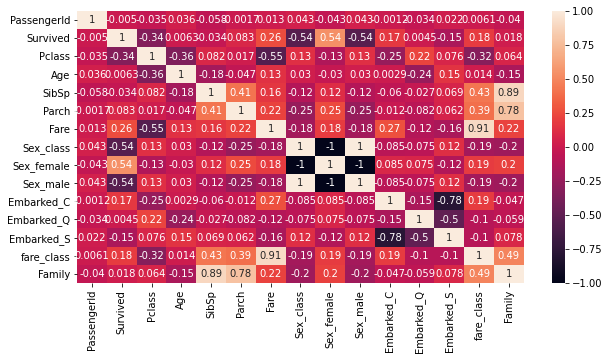

In [29]:
plt.figure(figsize = [10,5])
sns.heatmap(X.corr(),annot = True)

## Check correlation with encodings

<AxesSubplot:>

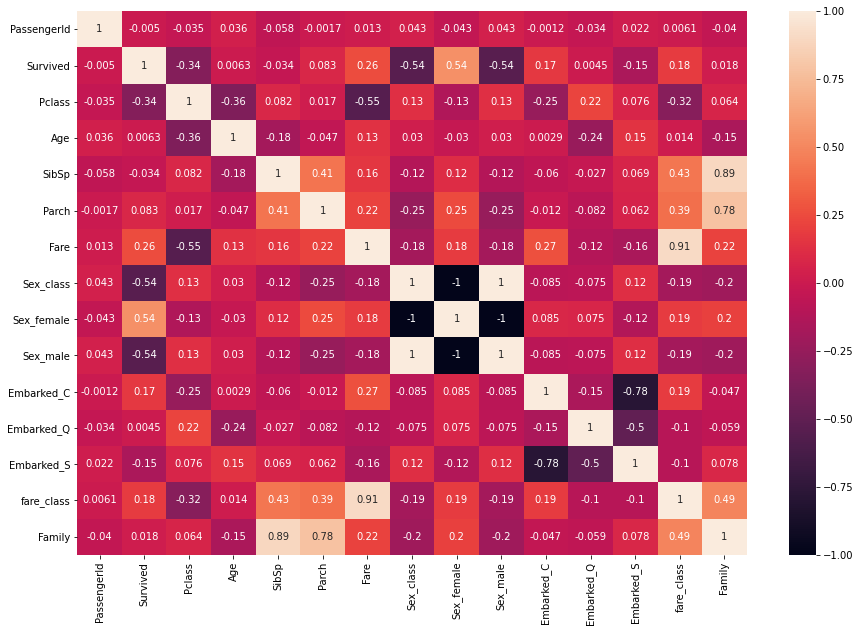

In [30]:
plt.figure(figsize=[15,10])
sns.heatmap(X.corr(),annot=True)

In [31]:
y = X['Survived']
X.drop(columns = ['Survived'],inplace = True)

## Feature Scaling

In [32]:
scaler = StandardScaler()

## Split the data

In [33]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.10, random_state=2)

# K Nearest Neighbor

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [35]:
features = ['Fare','Pclass','Sex_class','Embarked_Q','Embarked_C','Embarked_S','SibSp']

In [36]:
TrainX = np.array(X_train[features])
EvalX = np.array(X_val[features])

## Squareroot of count

In [37]:
n = TrainX.shape[0]

In [38]:
knn = KNeighborsClassifier(n_neighbors=int(np.ceil(np.sqrt(n))))

In [39]:
knn.fit(TrainX,y_train)

KNeighborsClassifier(n_neighbors=29)

In [40]:
y_predict = knn.predict(EvalX)

In [41]:
#10-fold cross validation, notice that I am giving X,y not X_train, y_train
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
mean_score = np.mean(scores)
mean_score

0.6332865168539327

## Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
tree = DecisionTreeClassifier(criterion="gini")

In [44]:
tree.fit(TrainX,y_train)

DecisionTreeClassifier()

In [45]:
y_predict = tree.predict(EvalX)

In [46]:
#10-fold cross validation, notice that I am giving X,y not X_train, y_train
scores = cross_val_score(tree, X, y, cv=10, scoring='accuracy')
mean_score = np.mean(scores)
std_score = np.std(scores)
print(mean_score)
print(std_score)

0.7593335035750766
0.07708991853427473


## Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier
import random

In [48]:
nest = np.array([random.randrange(50, 200) for iter in range(10)])
nest

array([ 96, 173,  70,  86, 153, 143,  55,  87,  59, 176])

In [49]:
mean_score = np.zeros(nest.shape[0])
std_score = np.zeros(nest.shape[0])

In [50]:
for i in range(nest.shape[0]):
    forest = RandomForestClassifier(n_estimators= nest[i],criterion = 'entropy',max_depth=5,random_state=1)
    forest.fit(TrainX,y_train)
    scores = cross_val_score(forest, X, y, cv=10, scoring='accuracy')
    mean_score[i] = np.mean(scores)
df_final = pd.DataFrame({"Estimators":nest,"Mean Accuracy":mean_score})
df_final

,Estimators,Mean Accuracy
0,96,0.807635
1,173,0.805363
2,70,0.808759
3,86,0.807623
4,153,0.806486
5,143,0.807623
6,55,0.809883
7,87,0.806499
8,59,0.808759
9,176,0.805363


In [51]:
#10-fold cross validation, notice that I am giving X,y not X_train, y_train
scores = cross_val_score(forest, X, y, cv=10, scoring='accuracy')
mean_score = np.mean(scores)
std_score = np.std(scores)
print(mean_score)
print(std_score)

0.8053626149131767
0.026913281305888718


## Apply models to test data

In [52]:
Xtest = Xtest[features]

In [53]:
y_predict = forest.predict(np.array(Xtest))

# Create dataframe for submission

In [54]:
df = pd.DataFrame({"PassengerId":id_pass ,"Survived":y_predict})
df.to_csv('my_submission5.csv', index=False)
df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
